# Т-Банк: поездки на самокатах

###### - Автор: Макарова Анастасия
- Дата: 26.06.2025

## Введение

Т-Город — это группа сервисов, которые помогают пользователям решать ежедневные задачи. Например, есть сервисы, которые позволяют купить билеты в кино или заказать продукты и так далее. В частности, существует сервис для аренды электросамокатов «Самокаты» — именно ему посвящена данная база.

Сервис позволяет воспользоваться самокатом от Юрента через приложение Т-Банка. Чтобы арендовать самокат, клиенту необходимо зайти в приложение, открыть сервис «Самокаты» и отсканировать QR-код на руле самоката. В этот момент у клиента со счета списывается фиксированная сумма в качестве взноса. В конце поездки также списывается итоговая сумма за поездку. Данные охватывают сезон аренды самокатов 2024 года (с апреля по октябрь 2024).
Стоимость минуты и стоимость поездки измеряется в условных денежных единицах

### Цели и задачи проекта

- Провести разведочный анализ данных.
- Сформировать 2-3 продуктовые гипотезы, которые можно было бы проверить на данных из датасета.
- Выбрать одну из гипотезу и объяснить, почему она является самой перспективной.
- Попробовать определить долю сервиса Т-Банка в индустрии (области), к которой относится датасет.

### Содержание проекта

1. Введение.
2. Знакомство с данными: загрузка и первичная предобработка.
3. Предобработка данных, предварительное исследование.
4. Исследовательский анализ объединённых таблиц
5. Итоговый вывод и рекомендации.


## Шаг 1. Знакомство с данными: загрузка и первичная предобработка

Описание данных:
- `order_rk` - Идентификатор заказа (поездки)
- `party_rk_id` Идентификатор клиента
- `minute_cost` Стоимость минуты
- `hold_amount` Размер суммы, которая замораживается на счете в момент
взятия самоката
- `transport_model` Название модели самоката
- `distance_km` Километраж поездки
- `created_dttm` Дата и время создания заказа
- `book_start_dttm` Дата и время начала поездки
- `book_time_zone_cd` Часовой пояс
- `local_book_start_dttm` Дата и время начала поездки в часовом поясе человека,
который брал самокат
- `nominal_price_rub_amt` Стоимость поездки
- `loyalty_accrual_rub_amt` Размер выплаченного кэшбэка в рублях
- `loyalty_accrual_bns_am't` Размер выплаченного кэшбэка в бонусах (если оплата
происходила с помощью кредитной карты)
- `Gender_cd` Пол клиента 
- `Age` Возраст клиента
- `Education_level` Уровень образования клиента:
`SCH` — начальное, среднее
`GRD` — высшее
`UGR` — неполное высшее
`PGR` — два высших
`ACD` — ученая степень
- `lvn_state_nm` Регион проживания человека

- `marital_status_cd` Семейный статус человека:
`IMR` — состоит в незарегистрированном браке
`MAR` —женат/замужем
`DLW` — не проживает с супругом(ой)
`OMR` — состоит в зарегистрированном браке
`CIV` — гражданский брак
`UNM` — холост/не замужем 
`DIV` — разведен(а)
`FAL` — никогда не состоял(а) в браке
`WID` — вдовец/вдова



In [1]:
!pip install phik

In [2]:
# Импортируем библиотеки
import pandas as pd

# Загружаем библиотеки для визуализации данных
import matplotlib.pyplot as plt
import seaborn as sns

# Загружаем библиотеку для расчёта коэффициента корреляции phi_k
from phik import phik_matrix

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
# Выгружаем данные основных таблиц в переменные
df = pd.read_csv('kicksharing.csv')

In [5]:
# выводим первые строки
df.head(10)

,order_rk,party_rk,gender_cd,age,education_level_cd,marital_status_cd,lvn_state_nm,minute_cost,activation_cost,hold_amount,transport_model,distance_km,created_dttm,book_start_dttm,book_end_dttm,book_time_zone_cd,local_book_start_dttm,nominal_price_rub_amt,loyalty_accrual_rub_amt,loyalty_accrual_bns_amt
0,266071307,761067705,M,40,UGR,DIV,ТЮМЕНСКАЯ ОБЛ,4.99,30.0,300.0,SL,3.690479,2024-08-07 09:47:25.000000,2024-08-07 09:47:29.325252,2024-08-07 10:07:59.339524,5,2024-08-07 11:47:29.325252,134.79,19.48,NaN
1,355113920,614049469,F,30,GRD,MAR,РОСТОВСКАЯ ОБЛ,8.49,50.0,300.0,SL,1.114912,2024-10-17 14:57:20.000000,2024-10-17 14:57:24.586000,2024-10-17 15:04:19.419607,3,2024-10-17 14:57:24.586000,109.43,40.30,NaN
2,347424551,757583701,M,28,UGR,UNM,СВЕРДЛОВСКАЯ ОБЛ,5.99,30.0,300.0,E,1.515612,2024-09-19 05:31:41.000000,2024-09-19 05:34:59.476000,2024-09-19 05:41:50.164372,5,2024-09-19 07:34:59.476000,71.93,10.79,NaN
3,351562959,541367366,M,24,GRD,UNM,Г МОСКВА,8.99,50.0,300.0,SL,0.499411,2024-10-04 16:05:09.000000,2024-10-04 16:05:13.162000,2024-10-04 16:07:31.724918,3,2024-10-04 16:05:13.162000,76.97,7.70,NaN
4,258647149,238473615,M,34,NaN,NaN,Г МОСКВА,6.99,50.0,300.0,SL,2.602028,2024-07-10 06:57:40.000000,2024-07-10 06:57:43.017125,2024-07-10 07:07:48.446462,3,2024-07-10 06:57:43.017125,126.89,25.38,NaN
5,277397094,5247768,M,42,NaN,NaN,МОСКВА,7.49,50.0,300.0,SL,0.016090,2024-09-10 09:40:18.000000,2024-09-10 09:40:24.036000,2024-09-10 09:41:03.644495,3,2024-09-10 09:40:24.036000,0.00,NaN,NaN
6,273528957,801272780,F,19,NaN,NaN,РЕСП ТАТАРСТАН,7.49,30.0,300.0,SL,4.086853,2024-09-03 14:10:29.000000,2024-09-03 14:10:34.524349,2024-09-03 14:21:25.119585,3,2024-09-03 14:10:34.524349,112.39,28.00,NaN
7,265062394,866880584,M,38,NaN,NaN,СВЕРДЛОВСКАЯ ОБЛ,5.99,30.0,300.0,E,2.370597,2024-08-03 03:09:35.000000,2024-08-03 03:09:38.493851,2024-08-03 03:18:47.841493,5,2024-08-03 05:09:38.493851,89.90,12.99,NaN
8,351562880,762053500,M,19,NaN,NaN,НОВОСИБИРСКАЯ ОБЛ,5.99,30.0,300.0,E,0.101272,2024-10-04 10:45:16.000000,2024-10-04 10:45:20.457000,2024-10-04 10:47:39.863967,7,2024-10-04 14:45:20.457000,47.97,4.80,NaN
9,269365210,161703813,M,31,UGR,MAR,ЧЕЛЯБИНСКАЯ ОБЛ,6.49,30.0,300.0,E,1.487792,2024-08-19 14:35:17.000000,2024-08-19 14:35:20.199325,2024-08-19 14:42:53.835731,5,2024-08-19 16:35:20.199325,81.92,81.92,NaN


In [6]:
# Выводим информацию о датафрейме
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396749 entries, 0 to 396748
Data columns (total 20 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   order_rk                 396749 non-null  int64  
 1   party_rk                 396749 non-null  int64  
 2   gender_cd                393828 non-null  object 
 3   age                      396749 non-null  int64  
 4   education_level_cd       190059 non-null  object 
 5   marital_status_cd        217729 non-null  object 
 6   lvn_state_nm             362572 non-null  object 
 7   minute_cost              396749 non-null  float64
 8   activation_cost          396749 non-null  float64
 9   hold_amount              396749 non-null  float64
 10  transport_model          396749 non-null  object 
 11  distance_km              396749 non-null  float64
 12  created_dttm             396749 non-null  object 
 13  book_start_dttm          396749 non-null  object 
 14  book

Датасет `city_clients.csv` содержит 20 столбцов и 396749 строк.

После первичного анализа данных можно сделать следующие выводы:
- Названия столбцов приведены к одному виду snake case.
- Столбцы `created_dttm`, `book_start_dttm`, `local_book_start_dttm `имеют формат object нужно поменять на datetime64.
- Пропуски содержатся в  столбцах `education_level_cd`, `marital_status_cd`,  `lvn_state_nm`, `loyalty_accrual_rub_amt`, `loyalty_accrual_bns_amt`. Эта информация касаеться семейного статуса, образования и региона, а также информация о кэшбеке.
- Судя по первому знакомству с данными, значения в столбцах соответствуют своему описанию.

In [7]:
# Преобразуем столбцы в формат даты
df['created_dttm']=pd.to_datetime(df['created_dttm'])
df['book_start_dttm']=pd.to_datetime(df['book_start_dttm'])
df['local_book_start_dttm']=pd.to_datetime(df['local_book_start_dttm'])

In [8]:
# Проверим результат преобразования
df.dtypes

order_rk                            int64
party_rk                            int64
gender_cd                          object
age                                 int64
education_level_cd                 object
marital_status_cd                  object
lvn_state_nm                       object
minute_cost                       float64
activation_cost                   float64
hold_amount                       float64
transport_model                    object
distance_km                       float64
created_dttm               datetime64[ns]
book_start_dttm            datetime64[ns]
book_end_dttm                      object
book_time_zone_cd                   int64
local_book_start_dttm      datetime64[ns]
nominal_price_rub_amt             float64
loyalty_accrual_rub_amt           float64
loyalty_accrual_bns_amt           float64
dtype: object

## 2. Исследовательский анализ

Рассмотрим топ-20 городв по колличеству уникальных клиентов.

In [53]:
user_df=df.groupby('lvn_state_nm')['party_rk'].nunique().sort_values(ascending=False).reset_index()
user_df.head(20)

,lvn_state_nm,party_rk
0,Г МОСКВА,11708
1,МОСКОВСКАЯ ОБЛ,6044
2,Г САНКТ-ПЕТЕРБУРГ,5490
3,СВЕРДЛОВСКАЯ ОБЛ,3275
4,КРАСНОДАРСКИЙ КРАЙ,2233
5,РЕСП ТАТАРСТАН,1813
6,РЕСП БАШКОРТОСТАН,1582
7,НИЖЕГОРОДСКАЯ ОБЛ,1495
8,НОВОСИБИРСКАЯ ОБЛ,1148
9,ЧЕЛЯБИНСКАЯ ОБЛ,1044


Видно, что большинство клиентов в городах: Москва, Московская область, Санкт-Петербург, Краснодарский край.

In [54]:
user_df_count=df['party_rk'].nunique()
user_df_count

64052

64052 уникальных поьльзователя оформляли поездки с апреля по ноябрь 2024 года

In [56]:
price_sum=round(df['nominal_price_rub_amt'].sum(),2)
price_sum

50644095.02

Выручка составила 50611095 руб с апреля по ноябрь 2024 года

In [10]:
user_df=df.groupby('lvn_state_nm')['order_rk'].nunique().sort_values(ascending=False).reset_index()
user_df.head(20)

,lvn_state_nm,order_rk
0,Г МОСКВА,90897
1,МОСКОВСКАЯ ОБЛ,40440
2,Г САНКТ-ПЕТЕРБУРГ,36867
3,СВЕРДЛОВСКАЯ ОБЛ,28952
4,КРАСНОДАРСКИЙ КРАЙ,16533
5,РЕСП ТАТАРСТАН,9499
6,РЕСП БАШКОРТОСТАН,8377
7,НИЖЕГОРОДСКАЯ ОБЛ,7758
8,НОВОСИБИРСКАЯ ОБЛ,7158
9,КРАСНОЯРСКИЙ КРАЙ,5671


посмотрим распределение клиентов по возрастам

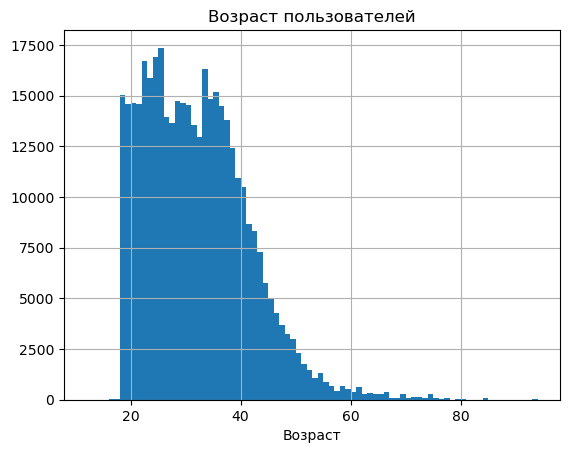

In [11]:
n_bins = df['age'].max() - df['age'].min()

# 2. Строим гистограмму
df['age'].hist(bins=n_bins)

# 3. Назначаем заголовок графика
plt.title('Возраст пользователей')

# 4. Устанавливаем подпись оси X
plt.xlabel('Возраст')

# 5. Отображаем гистограмму
plt.show()

Пользователи ,которые пользуються сервисом - от 18 до 90 лет. Основная часть пользователей находиться в возрастной категории от 18 до 40
лет. 

Длительность и расстояние поездки является важной метрикой в работе сервиса проката самокатов. Если средняя длительность или расстояние поездок будет слишком высокой, самокаты будут быстрее выходить из строя. Если слишком низкой, значит, клиентам что-то не нравится в сервисе.

In [12]:
gender_type_count=df['gender_cd'].value_counts().sort_values(ascending=False)
print(gender_type_count)

gender_cd
M    335458
F     58370
Name: count, dtype: int64


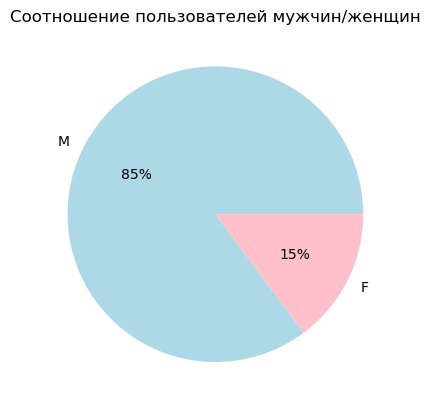

In [13]:
gender_type_count.plot(
    kind= 'pie',
    title='Соотношение пользователей мужчин/женщин',
    autopct= '%.0f%%',
    ylabel='',
    colors=['lightblue', 'pink']
)

plt.show()

Мужчины чаще оформляют заказы ,чем женщины

In [14]:
distance_df_mean =round(df['distance_km'].mean())
distance_df_std =round(df['distance_km'].std())

distance_pct25 =round(df['distance_km'].quantile(0.25))
distance_pct75 =round(df['distance_km'].quantile(0.75))

print(f'Средний километраж поездки {distance_df_mean} км со стандартным отклонением {distance_df_std}. Основная часть поездок  от {distance_pct25} до {distance_pct75} км.')

Средний километраж поездки 4 км со стандартным отклонением 142. Основная часть поездок  от 1 до 3 км.


Изучим поведение пользователей с программой лояльности и без. Создадим 2 датафрейма

In [15]:
# Создаем DataFrame для пользователей с программой лояльности 
df_loyalty = df[df['loyalty_accrual_rub_amt'].notna() | df['loyalty_accrual_bns_amt'].notna()]

# Создаем DataFrame для пользователей без программы лояльности
df_no_loyalty = df[df['loyalty_accrual_rub_amt'].isnull() & df['loyalty_accrual_bns_amt'].isnull()]

Рассчитаем колличество поездок с начислением кэшбека и без

In [16]:
order_loyalty=df_loyalty['order_rk'].nunique()
order_loyalty

388936

In [17]:
order_no_loyalty=df_no_loyalty['order_rk'].nunique()
order_no_loyalty

7813

В большинстве случаев заказы происходят с начислением кэшбека.

In [18]:
# Расчет среднего расстояния поездки для пользователей с кешбеком и без
mean_duration_free = round(df_loyalty['distance_km'].mean())
mean_duration_ultra = round(df_no_loyalty['distance_km'].mean())
print(f'Средняя длительность поездки для пользователей с кэшбеком {mean_duration_free} км, а для пользователей без кэшбека{mean_duration_ultra} км')

Средняя длительность поездки для пользователей с кэшбеком 4 км, а для пользователей без кэшбека1 км


Важно понять, тратят ли пользователи с кэшбеком больше времени на поездки? 
Сформулируем нулевую и альтернативную гипотезы:
Нулевая гипотеза (Н0): Средняя длинна поездки у пользователей с кэшбеком и без одинаковое.
Альтернативная гипотеза (Н1): Средняя длинна поездки  у пользователей с кешбеком больше, чем у пользователей без подписки.

Рассчитаем среднюю выручку от поездок с начислением кэшбека и без

In [19]:
price_loyalty=round(df_loyalty['nominal_price_rub_amt'].sum()/order_loyalty,2)
price_no_loyalty=round(df_no_loyalty['nominal_price_rub_amt'].sum()/order_no_loyalty,2)
print(f'Средняя стоимость поездки для пользователей с кэшбеком {price_loyalty} руб, а для пользователей без кэшбека {price_no_loyalty} руб')

Средняя стоимость поездки для пользователей с кэшбеком 129.96 руб, а для пользователей без кэшбека 12.53 руб


Сформулируем нулевую и альтернативную гипотезы: 

Нулевая гипотеза (Н0): Средняя стоимость поездки у пользователей с кэшбеком и без одинаковое. 
Альтернативная гипотеза (Н1): Средняя стоимость поездки у пользователей с кешбеком больше, чем у пользователей без подписки.

In [20]:
# Посчитаем количество заказов для покупателей с разным семейным положением
print('Распределение заказов в зависимости от семейного статуса:')
status_user=df.groupby('marital_status_cd')['order_rk'].nunique().sort_values(ascending=False)
status_user

Распределение заказов в зависимости от семейного статуса:


marital_status_cd
UNM    116094
MAR     74061
CIV     15036
DIV     11820
WID       718
Name: order_rk, dtype: int64

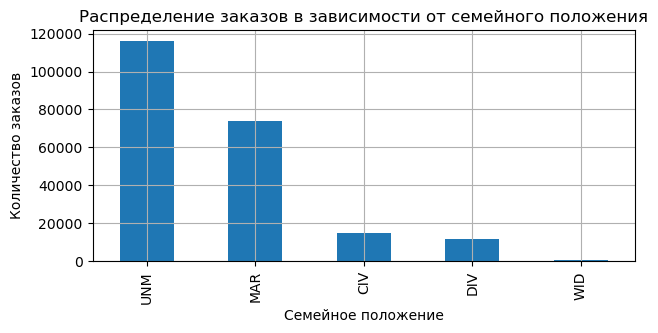

In [21]:
# Создаём контейнер графика matplotlib и задаём его размер
plt.figure(figsize=(7, 3))

# Строим столбчатую диаграмму с помощью pandas через plot(kind='bar')
status_user.plot(
               kind='bar', # Тип графика - столбчатая диаграмма
               rot=90, # Градус вращения подписи по оси Х
               legend=False, # Выключаем легенду
               title=f'Распределение заказов в зависимости от семейного положения'
)

# Настраиваем оформление графика
plt.xlabel('Семейное положение')
plt.ylabel('Количество заказов')
plt.grid()

# Выводим график
plt.show()


Большинство заказов совершают люди с полодение - 
- `UNM` не замужен/холост - 116094 заказов
- `MAR` —женат/замужем - 74061,
- `CIV` — гражданский брак -15036,
- `DIV` — разведен(а) - 11820
- `WID` — вдовец/вдова - 718 заказов.

Нулевая гипотеза (Н0): Люди пользуються сервисом независомо от семейного положения. 
Альтернативная гипотеза (Н1): Колличество заказов у людей холостых больше чем у семейных. Это может быть связано с тем,что юди в браке (MAR, CIV) и разведенные (DIV) могут реже делать отдельные заказы для себя, так как обычно заказывают товары для всей семьи оптом.

In [22]:
# Посчитаем количество заказов для покупателей в зависимости от уровня образования
print('Распределение заказов в зависимости от уровня образования:')
education_user=df.groupby('education_level_cd')['order_rk'].nunique().sort_values(ascending=False)
education_user

Распределение заказов в зависимости от уровня образования:


education_level_cd
GRD    94341
SCH    51273
UGR    38896
PGR     4224
ACD     1325
Name: order_rk, dtype: int64

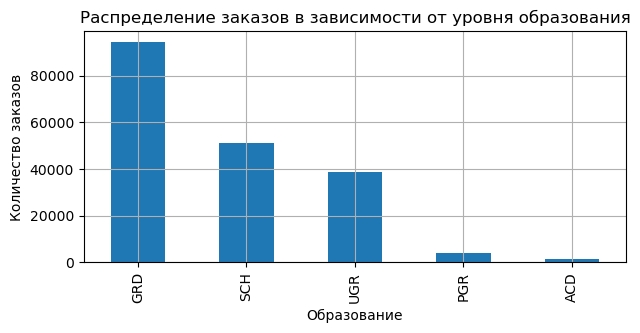

In [23]:
# Создаём контейнер графика matplotlib и задаём его размер
plt.figure(figsize=(7, 3))

# Строим столбчатую диаграмму с помощью pandas через plot(kind='bar')
education_user.plot(
               kind='bar', # Тип графика - столбчатая диаграмма
               rot=90, # Градус вращения подписи по оси Х
               legend=False, # Выключаем легенду
               title=f'Распределение заказов в зависимости от уровня образования'
)

# Настраиваем оформление графика
plt.xlabel('Образование')
plt.ylabel('Количество заказов')
plt.grid()

# Выводим график
plt.show()

Больше всего заказов у людей с 
- `GRD` — высшим образованием - 94341
- `SCH` — начальное, среднее - 51273
- `UGR` — неполное высшее - 38896
- `PGR` — два высших -4224
- `ACD` — ученая степень -1325

посмотрим в какое время чаще всего оформляют заказы по локальному времени клиента.

In [25]:
# округлим дату заказа по локальному времени клиента до часов
df['rounded_hour'] = df['local_book_start_dttm'].dt.hour

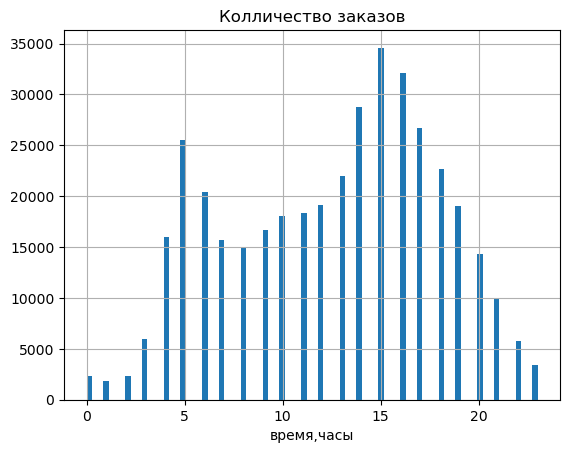

In [26]:
df['rounded_hour'].hist(bins=n_bins)

# 3. Назначаем заголовок графика
plt.title('Распределение заказов в течении дня')

# 4. Устанавливаем подпись оси X
plt.xlabel('время,часы')

# 5. Отображаем гистограмму
plt.show()


Большинство заказов совершается в дневные часы с 14 до 16 часов. Также есть небольше уведечение заказов в утренние часы.

In [33]:
df['activity_month'] = (pd.to_datetime(df['local_book_start_dttm'])).dt.to_period('M')
df['activity_month'] = df['activity_month'].dt.to_timestamp()

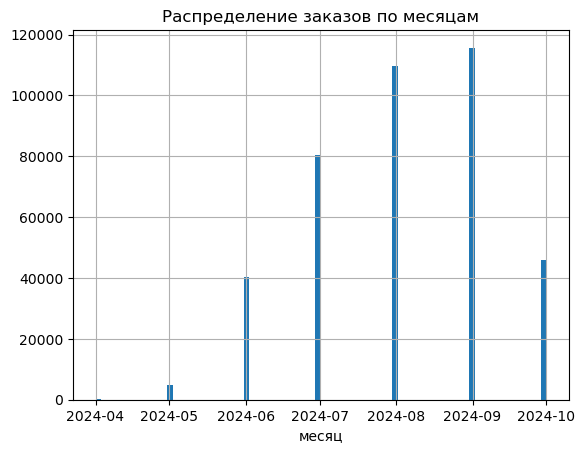

In [34]:
df['activity_month'].hist(bins=n_bins)

# 3. Назначаем заголовок графика
plt.title('Распределение заказов по месяцам')

# 4. Устанавливаем подпись оси X
plt.xlabel('месяц')

# 5. Отображаем гистограмму
plt.show()

In [42]:
# Посчитаем количество заказов для покупателей в зависимости от уровня образования
print('Распределение стоимости минуты в зависимости от часов дня:')
minute=df.groupby('rounded_hour')['minute_cost'].mean()

Распределение стоимости минуты в зависимости от часов дня:


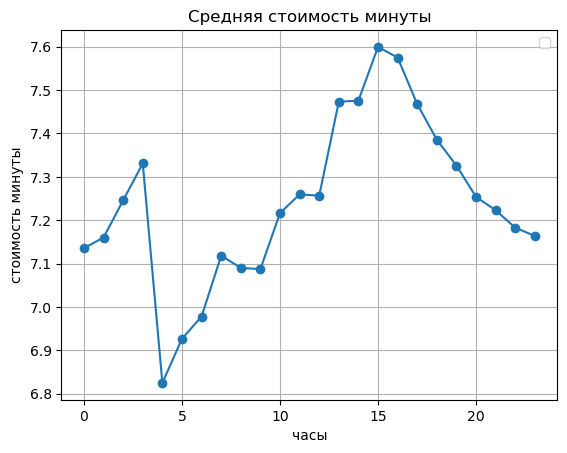

In [41]:

plt.plot(minute, marker='o')

# Добавим заголовок и подписи осей
plt.title('Средняя стоимость минуты')
plt.xlabel('часы')
plt.ylabel('стоимость минуты')
plt.legend()
plt.grid(True)
plt.show()

In [46]:
df['created_col'] = pd.to_datetime(df['created_dttm']).dt.round('H')
df['book_start_col'] = pd.to_datetime(df['book_start_dttm']).dt.round('H')

    # Вычисляем разницу во времени в секундах
df['result_col'] = (df['book_start_col'] - df['created_col']).dt.total_seconds() / 3600

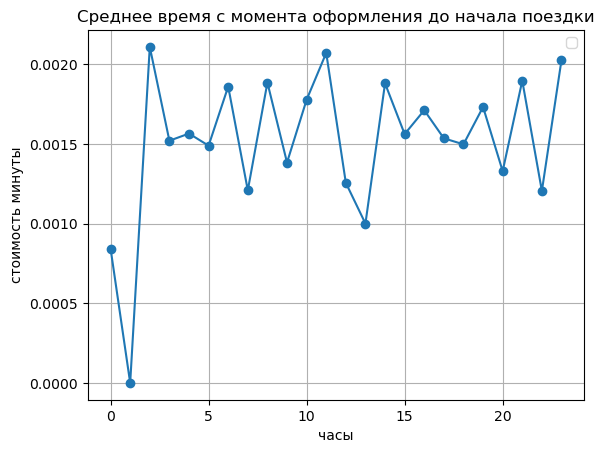

In [50]:
# Посчитаем количество среднее время ожидание с момента оформления заказа до начала поездки
minute=df.groupby('rounded_hour')['result_col'].mean()
plt.plot(minute, marker='o')

# Добавим заголовок и подписи осей
plt.title('Среднее время с момента оформления до начала поездки')
plt.xlabel('часы')
plt.ylabel('стоимость минуты')
plt.legend()
plt.grid(True)
plt.show()

Здесь все хорошо, время ожидания минимальное, распределено равномерно в течении дня, за исключением раннего утра.